In [1]:
import pandas as pd
pd.set_option('display.max_rows', 250)

# Reading in Data

Since the training dataset is so large (about 37 million rows), I am going to handle this by reading the data in chunks of 500,000 records.

Once these are read in, I will append them all to a list which I will then concatenate into the dataframe which will be used for the rest of the analysis.

In [2]:
#train.csv
#reading in training data by chunks od 500
train_reader = pd.read_csv("C:/Users/phill/OneDrive/Desktop/Predictive-630/data/expedia-hotel-recommendations/train.csv",chunksize=500000)

#concatenating chunks
dfList = []
for df in train_reader:
    dfList.append(df)
    
train_df = pd.concat(dfList,sort=False)

In [3]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
print(train_df.shape)
print("train.csv: 37,670,293 rows and 24 columns")

(37670293, 24)
train.csv: 37,670,293 rows and 24 columns


In [5]:
#destination.csv
destination_df = pd.read_csv("C:/Users/phill/OneDrive/Desktop/Predictive-630/data/expedia-hotel-recommendations/destinations.csv")

In [6]:
destination_df.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [7]:
print(destination_df.shape)
print("destinations.csv: 62,106 rows and 150 columns")

(62106, 150)
destinations.csv: 62,106 rows and 150 columns


# EDA on train.csv

### Missing Data?

In [8]:
#loop through columns in dataframe
#check for any NaN values
for col in train_df.columns:
    print(col + ": " + str(train_df[col].isnull().values.any()))

date_time: False
site_name: False
posa_continent: False
user_location_country: False
user_location_region: False
user_location_city: False
orig_destination_distance: True
user_id: False
is_mobile: False
is_package: False
channel: False
srch_ci: True
srch_co: True
srch_adults_cnt: False
srch_children_cnt: False
srch_rm_cnt: False
srch_destination_id: False
srch_destination_type_id: False
is_booking: False
cnt: False
hotel_continent: False
hotel_country: False
hotel_market: False
hotel_cluster: False


Missing values in the following columns: orig_destination_distance, srch_ci (check-in date) & srch_co (check-out date). 

A null in 'orig_destination_distance' means the distance could not be calculated.

In [9]:
#finding number of missing values in columns with missing data
#getting counts of missing values in data frame
train_df.isnull().sum()

date_time                           0
site_name                           0
posa_continent                      0
user_location_country               0
user_location_region                0
user_location_city                  0
orig_destination_distance    13525001
user_id                             0
is_mobile                           0
is_package                          0
channel                             0
srch_ci                         47083
srch_co                         47084
srch_adults_cnt                     0
srch_children_cnt                   0
srch_rm_cnt                         0
srch_destination_id                 0
srch_destination_type_id            0
is_booking                          0
cnt                                 0
hotel_continent                     0
hotel_country                       0
hotel_market                        0
hotel_cluster                       0
dtype: int64

There are 13,525,001 missing values for orig_destination_distance. Given that there are over 37 million rows in the dataset, this is about 1/3 of the dataset that is missing, which is something that should be investigated. However, a null value means the distance could not be calculated so I am not sure they are records that need to be outright removed given that they could contain other telling values.

For check-in date and check-out date columns, they contain about 47,000 records so we could look into performing imputation of some kind for those.

In [10]:
#getting rows with missing data
null_data = train_df[train_df.isnull().any(axis=1)]

In [11]:
#looking at records with missing data
null_data[['user_id','orig_destination_distance','channel','srch_ci','srch_co','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster']]

,user_id,orig_destination_distance,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
6,501,NaN,2,2014-08-01,2014-08-02,2,0,1,2,50,675,41
7,501,NaN,2,2014-08-01,2014-08-02,2,0,1,2,50,675,41
8,501,NaN,2,2014-08-01,2014-08-02,2,0,1,2,50,675,69
9,501,NaN,2,2014-08-01,2014-08-02,2,0,1,2,50,675,70
10,501,NaN,2,2014-08-01,2014-08-02,2,0,1,2,50,675,98
...,...,...,...,...,...,...,...,...,...,...,...,...
37670212,1197589,NaN,4,2013-05-18,2013-05-19,3,1,2,6,204,1614,50
37670215,1197641,NaN,9,2014-03-31,2014-04-01,2,0,1,2,50,661,50
37670216,1197641,NaN,9,2014-03-31,2014-04-01,2,0,1,2,50,661,50
37670217,1197641,NaN,9,2014-05-24,2014-05-26,2,0,1,2,50,576,48


There are about 47,080 rows which have missing values for check-in date and check-out date. With missing dates, I would prefer not to fill them with some other value since these dates could be important to determining the clusters for each hotel recommendation record. Therefore, I am just going to remove these from the dataset, especially since they are a small amount of the 37 million total records.

In [12]:
#dropping rows with missing values in orig_destination_distance, srch_ci & srch_co
#want to investigate how it affects modeling
train_df2 = train_df.dropna(subset=['orig_destination_distance','srch_ci','srch_co'])

In [13]:
#checking again for missing values
#getting counts of missing values in data frame
train_df2.isnull().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

## Column Dropping

When looking over the dataset, I initially want to drop the 'user_id' column as it does not really give any important information on the users looking for hotels to stay it. It is simply an identifier, and I don't think it will be useful in the problem of predicting the likelihood of whether an user will stay at 100 different hotel groups.

In [14]:
train_df2 = train_df2.drop('user_id',1)

## Checking for Duplicates

In [15]:
#checking for row-level duplicates in entire dataframe

print(train_df2.duplicated())

print("\nSum of duplicate categories: ")
print(train_df2.duplicated().sum())

0           False
1           False
2           False
3           False
4           False
            ...  
37670288    False
37670289    False
37670290    False
37670291    False
37670292    False
Length: 24117894, dtype: bool

Sum of duplicate categories: 
13


In [16]:
#removing row-level duplicates from dataset
# dropping duplicate values
train_df2.drop_duplicates(keep='first',inplace=True)

In [17]:
print(train_df2.shape)
print("13 duplicates removed")

(24117881, 23)
13 duplicates removed


In [18]:
train_df2.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

Most of the variables in the training set have a numeric type (int or float). This helps for modeling!

There are three variables which are object types: date_time, srch_ci and srch_co. Given that these are dates, we will need to convert them to numbers for use in the predictive models later.

In comparing the training data subset hotel_cluster histogram with the one for the entire training set, we can see the distributions are very similar (if not the same), which helps with providing faith in the sample of the data for maintaing the makeup of the data!

## Examining Variable Relationships

### Correlation Plot

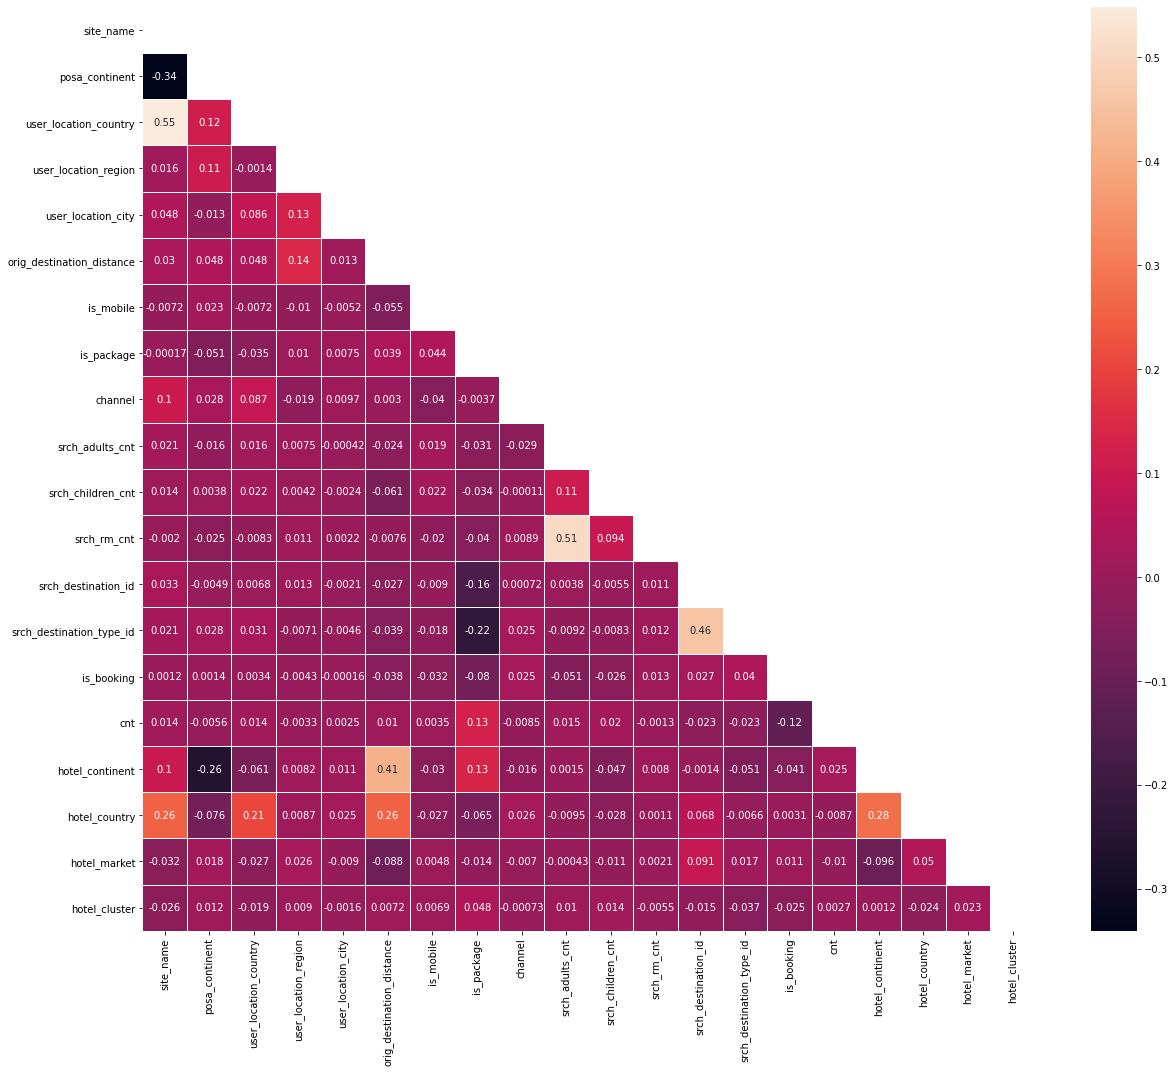

In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 17))
matrix = np.triu(train_df2.corr())
sns.heatmap(train_df2.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

For correlation assessment:
- There is a strong positive correlation (0.55) between user_location_country and site_name. user_location_country is the ID of the country for where the customer is located, and site_name is the ID of the expedia point of sale. It makes sense that these are correlated since the geographical user information is derived from the site_name. The ID numbers must have an inverse relationship, in that the ID of the site_name decreases as the ID of the country increases. However, ID numbers are not really reflected as numerical measures. 
- For positive correlations, the ones on the higher side are between srch_rm_cnt & srch_adults_cnt and srch_destination_type_id & srch_destination_id at 0.51 and 0.46 respectively. These are not super strong correlationships, and for the ID one, I don't see this one as being concerning given that they are ID values which are assigned based on different criteria. For the room count and adult count correlation, it makes sure that the number of rooms rented would increase as the number of adults staying increases. Therefore, through feature reduction techniques, we may find that both variables are not needed!

## Data Exploration - Visualizations

### Histogram of Cluster Distribution in Training Set

<AxesSubplot:xlabel='hotel_cluster', ylabel='Count'>

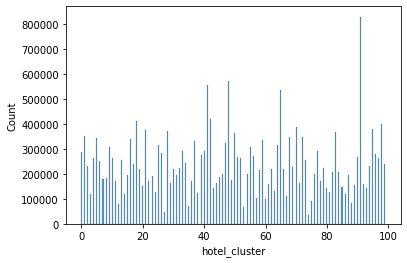

In [20]:
#plotting the distribution of hotel_cluster variable

sns.histplot(data=train_df2, x="hotel_cluster")

Looking at the count distribution for number of records in each hotel_cluster, they appear to be relatively well-distributed. There is not any significant skew which I think needs to be handled.

However, when investigating the balance of the classes, there seems to be an imbalance among them which may need to be handled before modeling, because some classes seem better represented in the dataset over others.

<AxesSubplot:xlabel='orig_destination_distance', ylabel='Count'>

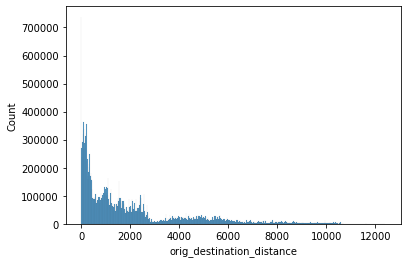

In [21]:
#plotting the distribution of orig_destination_distance variable

sns.histplot(data=train_df2, x="orig_destination_distance")

The other measures also show that majority of users book within ~3,000 miles of them and their destination. This can obviously encompass a large range of places ... for example, from Chicago to London it is about 4,000 miles so not too much of a difference from three-thousand. 

However, there are location bookings which were made up to 10,000 miles from an user's location, which descends continents!

<AxesSubplot:>

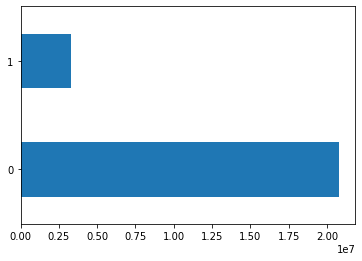

In [22]:
#bar chart of is_mobile --> 1 when connected from mobile device
train_df2['is_mobile'].value_counts().plot(kind='barh')

Many more people connected to Expedia from a device other than their mobile when compared against mobile users, over 20 million vs. 3 million respectively. About 1/6 difference for users!

<AxesSubplot:>

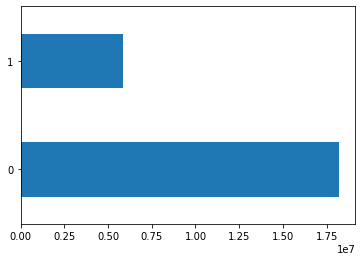

In [23]:
#bar chart of is_package --> 1 for booking generated as part of package
train_df2['is_package'].value_counts().plot(kind='barh')

Similar to above, for the Expedia users, many more did not book as a part of a package when compared to package customers ... 17.5 million vs. about 600,000 users. These are quite big differences in groupings!

<AxesSubplot:>

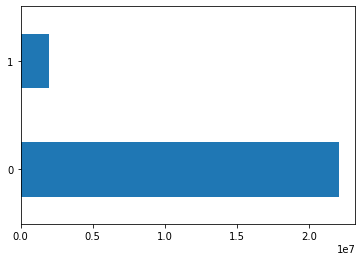

In [24]:
#bar chart of is_booking --> 1 IF BOOKING, 0 IF CLICK
train_df2['is_booking'].value_counts().plot(kind='barh')

This is very interesting! Majority of the people on the Expedia website clicked than actually booked a hotel room experience. The clusters that contain these users would be great for targeting in terms of identifying customers which they can create more engagement and advertising for :)

<AxesSubplot:xlabel='srch_adults_cnt', ylabel='Count'>

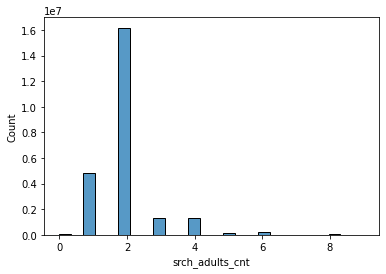

In [25]:
#histograms for room count, adult count and children count
sns.histplot(data=train_df2, x="srch_adults_cnt")

<AxesSubplot:xlabel='srch_children_cnt', ylabel='Count'>

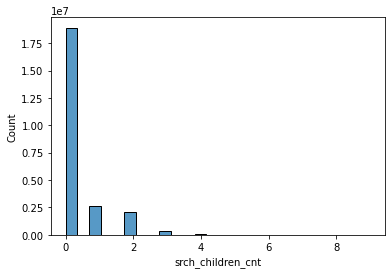

In [26]:
sns.histplot(data=train_df2, x="srch_children_cnt")

<AxesSubplot:xlabel='srch_rm_cnt', ylabel='Count'>

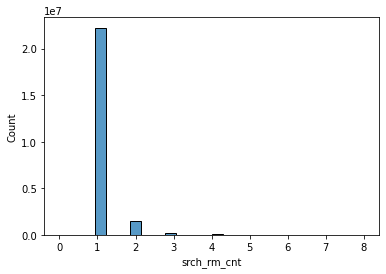

In [27]:
sns.histplot(data=train_df2, x="srch_rm_cnt")

I think the counts shown in the histogram above are really great for clusters since there are different type of people who are going to do bookings with Expedia: single people, couples, families, etc. Therefore, these can be very telling of the groups of people making trips and also probably gives some indication as well of where they may be making their destination.

It seems that for most users, they only book one room for their trips; the max room count is 4 and a very small amount of users make that.

Almost people don't seem to be traveling with kids, as zero children count holds the majority of the values in the dataset.

In terms of adults, the majority seems to be at two, which could again be indicative of couples making bookings or just form of close relationship sharing a room. 

Since there's not much variety in these counts, I am not sure how helpful they will be in deciding the hotel clusters for users, since they won't cause much split in the dataset for classification. We will have to see with feature reduction if these are kept in.

## EDA on destination_df

This destination dataset contains information on the IDs of the destinations where the hotel searches were performed and the latent description of those search regions. 

In [28]:
#describing the destination dataset
destination_df.describe()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,...,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000,62106.000000
mean,32359.463884,-2.193903,-2.202854,-2.207391,-2.194040,-2.161497,-2.045110,-2.202433,-2.203207,-2.107808,...,-2.204092,-2.196919,-2.203262,-2.205128,-2.201925,-2.203332,-2.202989,-2.208359,-2.208269,-2.199470
std,18711.765765,0.038576,0.041065,0.040092,0.041406,0.066197,0.135803,0.038886,0.036578,0.197904,...,0.037164,0.059914,0.046520,0.039465,0.041603,0.038239,0.051552,0.038035,0.038569,0.042438
min,0.000000,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
25%,16320.250000,-2.209336,-2.220192,-2.223679,-2.211437,-2.192158,-2.154267,-2.218745,-2.219086,-2.197704,...,-2.219630,-2.216147,-2.220347,-2.221893,-2.218394,-2.220500,-2.221748,-2.224618,-2.224290,-2.216428
50%,32277.500000,-2.185969,-2.193247,-2.195208,-2.188057,-2.178255,-2.088598,-2.192513,-2.192915,-2.177229,...,-2.192232,-2.190525,-2.192814,-2.194127,-2.191564,-2.192200,-2.193352,-2.196185,-2.195900,-2.190953
75%,48467.750000,-2.175309,-2.179261,-2.179990,-2.176763,-2.153317,-1.975940,-2.178976,-2.179164,-2.123598,...,-2.178093,-2.177777,-2.178996,-2.179475,-2.178335,-2.177590,-2.178927,-2.180602,-2.180380,-2.178088
max,64993.000000,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


### Overlapping Histograms of few "d" variables

<AxesSubplot:xlabel='d1', ylabel='Count'>

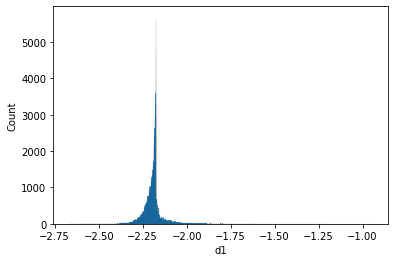

In [29]:
#histogram of d1
sns.histplot(data=destination_df, x="d1")
#histogram of d20
sns.histplot(data=destination_df, x="d20")
#histogram of d45
sns.histplot(data=destination_df, x="d45")
#histogram of d79
sns.histplot(data=destination_df, x="d79")
#histogram of d149
sns.histplot(data=destination_df, x="d149")

From the plot of overlapping histograms for few search regions' latent descriptions, we can see that these five, at least, follow very similar distributions. The data is clustered rather closely around a single peak, which seems to be ~-2.20. The sharp and narrow peak suggests that the latencies are generally consistent between search regions.

The latencies also seem to be relatively normally distributed as they are centered around the single 'peak' in the curve. 

### Correlation Plot

In [30]:
#getting highest correlation pairs
#correlation matrix is quite hard to understand with 150 columns
c = destination_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [31]:
print("\nSum of duplicates in correlations: ")
print(so.duplicated().sum())


Sum of duplicates in correlations: 
11324


In [32]:
#removing row-level duplicates from dataset
# dropping duplicate values
so.drop_duplicates(keep='first',inplace=True)

In [33]:
so.shape

(11176,)

In [34]:
print(so[11165:11175])

d15   d135    0.991132
d72   d116    0.992245
d65   d116    0.993666
d116  d135    0.993674
d72   d123    0.995725
d65   d123    0.996930
d123  d135    0.996965
d65   d72     0.998353
d135  d72     0.998382
d65   d135    0.999520
dtype: float64


There are some very high correlations between the search region latencies in the destinations dataset. This could be due to search regions being close in proximity to eachother, which then I would assume would affect latency since they are somewhat overlapping in connections.

When performing feature reduction, we will have to determine which of these search regions are vital to the clusters, especially since there are many of them ... 149 "d" columns.

Also, in terms of the realm of user predictions, I am unsure how search region latencies would contribute to the hotel that someone may decide to book. Therefore, I have decided to not use it for model since I do not have great clarity on the data and I don't think it is useful to our business problem.

## Taking Subset of train_df for processing purposes

In [35]:
#taking a sample of 100,000 records from the training dataset --> currently has over 24 million rows --> about 1/24
#using random_state to ensure the diversity of the data is maintained
train_dfSub = train_df2.sample(n=100000,random_state=42)

In [36]:
train_dfSub.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
27432483,2014-10-04 13:49:19,8,4,77,824,53280,4556.3400,0,0,5,...,0,1,20762,6,0,1,3,182,81,57
25552549,2014-06-06 17:03:04,2,3,66,321,33705,1693.4533,1,1,9,...,1,1,8791,1,0,2,4,8,110,40
2603791,2013-02-16 15:41:10,23,1,1,441,568,695.7907,0,1,9,...,0,1,8253,1,0,1,6,70,19,76
26414512,2014-07-12 01:15:13,2,3,66,322,45317,1095.7759,1,0,9,...,1,1,12233,6,0,1,2,50,675,98
35530739,2013-05-02 09:13:09,11,3,205,312,53607,4578.6075,0,0,9,...,0,1,8289,1,0,5,6,107,36,30


<AxesSubplot:xlabel='hotel_cluster', ylabel='Count'>

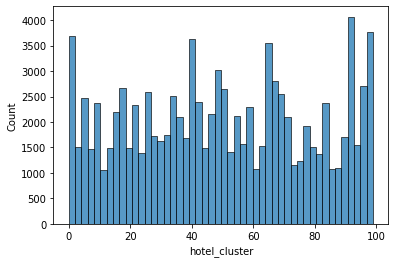

In [37]:
#histogram of hotel_cluster variable to compare with whole dataset

sns.histplot(data=train_dfSub, x="hotel_cluster")

## Encoding for Non-Numeric Columns

The non-numeric columns in our dataset are date_time, srch_ci (check-in date) and srch_co (check-out date). They are currently defined as objects, so I will be converting them to datetime format and then to numeric for modeling purposes.

### Object to DateTime

In [38]:
train_dfSub['date_time'] = pd.to_datetime(train_dfSub['date_time'])

In [39]:
train_dfSub['srch_ci'] = pd.to_datetime(train_dfSub['srch_ci'])

In [40]:
train_dfSub['srch_co'] = pd.to_datetime(train_dfSub['srch_co'])

### DateTime to Numeric

In [41]:
# toordinal() function returns the proleptic Gregorian ordinal of a date.
#day count from the date 01/01/01
train_dfSub['date_time'] = train_dfSub['date_time'].apply(lambda x:x.toordinal())
print(train_dfSub['date_time'])

27432483    735510
25552549    735390
2603791     734915
26414512    735426
35530739    734990
             ...  
5078866     735446
6648130     735490
32182492    735340
4410348     735332
17174432    735053
Name: date_time, Length: 100000, dtype: int64


In [42]:
train_dfSub['srch_ci'] = train_dfSub['srch_ci'].apply(lambda x:x.toordinal())

In [43]:
train_dfSub['srch_co'] = train_dfSub['srch_co'].apply(lambda x:x.toordinal())

## Feature Selection

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#features --> all variables except for day_promocat
x=train_dfSub.drop(['hotel_cluster'],axis=1)
#target variable --> day_promocat
y= train_dfSub['hotel_cluster']

In [45]:
print(x.shape)
print(y.shape)

(100000, 22)
(100000,)


In [46]:
#function for calculating the VIF score for each feature to determine if collinearity exists among variable
#finding values with large absolute values greater than 5
#function from https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd
def cal_vif(x):
    #threshold for VIF score
    thresh = 5
    output = pd.DataFrame()
    #number of columns
    k = x.shape[1]
    #calculate the VIF for the values in each column in the features
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        #determine the feature with max VIF
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        #if max is not less than the threshold of 5.0, break and keep looking
        if(vif[a]<=thresh):
            break
        #else drop features and keep searching ... recursive
        if(i==1):
            output=x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j)for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)

In [47]:
selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[154211269.09216362, 2.8816866006208928, 43.724849324222944, 6.219727407168511, 5.9590663073360535, 3.9692282118354583, 2.5225316733330088, 1.1703849270900009, 1.6216560610385669, 3.6709986311675866, 71056549370.39777, 69939816397.41423, 8.418522573437631, 1.251059093818958, 9.996681648001134, 3.5752558644072683, 3.2174156966621856, 1.1273473886220398, 2.6315059945184287, 6.811639807548657, 3.579944964724239, 2.7998591393465593]
Max vif is for variable no :  10
Iteration no  2
[148527201.67191383, 2.881652330348754, 43.69105096311817, 6.215217571380036, 5.958615149340423, 3.968983238660307, 2.4794651124355447, 1.170384852234749, 1.5314582574518187, 3.670371373619393, 148548387.72558966, 8.418225541508507, 1.2493281195160402, 9.995301298371416, 3.5729645085186257, 3.2167311754444996, 1.1244644331663207, 2.6315058524386292, 6.808206858880548, 3.5745034094153514, 2.799840389201699]
Max vif is for variable no :  10
Iteration no  3
[71.1173906605984, 2.8816221593303273, 43.6

,site_name,user_location_country,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_country,hotel_market
27432483,8,77,53280,4556.3400,0,0,5,2,0,20762,6,0,1,182,81
25552549,2,66,33705,1693.4533,1,1,9,2,1,8791,1,0,2,8,110
2603791,23,1,568,695.7907,0,1,9,2,0,8253,1,0,1,70,19
26414512,2,66,45317,1095.7759,1,0,9,1,1,12233,6,0,1,50,675
35530739,11,205,53607,4578.6075,0,0,9,4,0,8289,1,0,5,107,36


In [48]:
print(selected_features.shape)

(100000, 15)


Number of features went from original 23 (after dropping user_id) to 15

## Predictive Modeling

In [49]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#split the dataset into training and test sets --> 75:25
#30% for testing
X_train,X_test,y_train,y_test=train_test_split(selected_features,y,test_size=0.30,random_state=42)

### Naive Bayes Classifier

A Naive Bayes classifier works by calculating the probabilities of each class and assumes that the probabilities of each attribute value is independent of the rest. 

It is used for classification problems, which is why it is useful for this problem since we are trying to perform classification with the hotel cluster values. 

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
# instantiate the model
gnb = GaussianNB()


# fit the model
#selected features from VIF function
#y is our target variable --> hotel_cluster
gnb.fit(X_train, y_train)

GaussianNB()

In [52]:
#predict the results
y_pred = gnb.predict(X_test)

y_pred

array([95, 26, 85, ..., 54, 55, 54], dtype=int64)

### Naive Bayes - Evaluation

In [53]:
# Evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.060533333333333335


For the Naive Bayes classifier, the accuracy score is very low at ~6.005%. This means that 6.005% of the time the classifier is able to make the correct predictions as to which hotel_cluster the user instances fall into.

In [54]:
#confusion matrix

# import the metrics class
from sklearn import metrics

#confusion matrix to evaluate the performance of the classification model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 40,   5,   0, ...,  15,   0,   0],
       [  0, 262,   0, ...,   3,   0,   0],
       [  6,   0,   0, ...,  31,   0,   0],
       ...,
       [ 20,   0,   0, ...,  52,   1,   0],
       [ 14,   0,   0, ...,  29,   0,   0],
       [  4,   0,   0, ...,  32,   0,   0]], dtype=int64)

In [55]:
#metrics for confusion matrix evaluation
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred,labels=np.unique(y_pred))}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.07      0.11      0.09       359
           1       0.26      0.59      0.36       447
           4       0.02      0.00      0.01       337
           5       0.03      0.03      0.03       445
           7       0.05      0.01      0.02       221
           8       0.00      0.00      0.00       214
           9       0.04      0.00      0.01       366
          10       0.00      0.00      0.00       312
          12       0.02      0.02      0.02        93
          15       0.00      0.00      0.00       252
          16       0.03      0.01      0.02       384
          18       0.00      0.00      0.00       509
          20       0.03      0.01      0.02       178
          21       0.00      0.00      0.00       469
          24       0.15      0.26      0.19       172
          25       0.00      0.00      0.00       382
          26       0.10      0.02      0.03       361
   

When looking at the classification report for the various hotel clusters, there are some with higher values of precision and recall such as #1 with a precision of 0.23 and a recall of 0.76. Also, for #65, it has a precision of 0.13 and a recall of 0.77.

This could be due to those classes having more representation in the dataset as mentioned earlier when looking at the histogram for hotel_cluster.

Therefore, I'd like to explore if handling the imbalanced classes helps with modeling results.

### Random Forest

A random forest is an ensemble of decision trees, and it can be used for classification and regression algorithms.

Random forest involves constructing a large number of decision trees from bootstrapped samples from the training dataset. It also involves a form of feature reduction in each split of the decision tree.

The effect is that the predictions, and in turn, prediction errors, made by each tree in the ensemble are more different or less correlated. When the predictions from these less correlated trees are averaged to make a prediction, it often results in better performance than bagged decision trees.

#### Run Model

In [56]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [57]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 24.48 degrees.


#### Evaluate Model

In [58]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print('Mean Absolute Percentage Error:', round(mape, 2), 'degrees.')

Mean Absolute Percentage Error: 2543878365598562.0 degrees.


Mean Absolute Percentage Error (MAPE) is a statistical measure to define the accuracy of this random forest model on our training and test sets.

The lower the MAPE, the better the fit of the model. For this random forest model, it is an extremely high MAPE value which is not a good sign for the model fit. Therefore, for this datset, I would say the random forest model does not do a good job of fifting the model as its error is extremely high

### Naive Bayes - Handling Imbalanced Classes (Took too long to run for final output --> still wanted to show results from when it did run fully)

Using penalized learning algorithms
- increase the cost of classification mistakes on the minority class
- Penalized-SVC (Support Vector Classifier)

In [ ]:
####### load library
from sklearn.svm import SVC

####### we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=False)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance

In [ ]:
#metrics for confusion matrix evaluation
print(f'Classification Report: \n{metrics.classification_report(y_test, svc_predict,labels=np.unique(svc_predict))}')

In [ ]:
####### Evaluate accuracy
print(accuracy_score(y_test, svc_predict))

Even when handling the imbalanced classes in the Naive Bayes classifier, the accuracy did not improve ... it actually decreased from 6.367% to 0.82133%. Therefore, the penalties on the minority classes were not enough of a compensation to improve the modeling efficacy for our dataset.

The recall for certain classes is moderate but the precision for all of the outputted classes is extremely low at basically 0. This shows that the model was not able to correctly classify the classes for any data points in the test set. This is obviously not a great performance for a predictive model.

### Ensemble Effect

I also wanted to try out some ensemble techniques, since they combine predictions from different models to generate a final prediction. The more models included, the better the overall performance hopefully!

Therefore, I am going to implement an AdaBoost Classifier to investigate if it performs with a different accuracy than the standard models above.

#### AdaBoost Classifier

AdaBoost Classifiers involve using very short decision trees as week learners that are added sequentially to the ensemble. Each subsequent model attemps to correct the predictions made by the model before it in the sequence. This is achieved by weighing the training dataset to put more focus on training examples on which prior models made prediction errors.

In [60]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
#building out the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
#fitting the model on our training set
model.fit(X_train,y_train)


results = model_selection.cross_val_score(model, X_train,y_train, cv=kfold)
print("Cross validation score: ", results.mean())

#predicting on test set
ada_preds = model.predict(X_test)

Cross validation score:  0.05024285714285713


In [61]:
ada_preds

array([66, 26, 52, ..., 91, 55, 91], dtype=int64)

In [62]:
#getting accuracy score
print("Accuracy % for AdaBoost %:",metrics.accuracy_score(y_test, ada_preds)*100)

Accuracy % for AdaBoost %: 4.526666666666666


In [64]:
#metrics for confusion matrix evaluation
print(f'Classification Report: \n{metrics.classification_report(y_test, ada_preds,labels=np.unique(ada_preds))}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.10      0.03      0.04       359
           8       0.00      0.00      0.00       214
          25       0.02      0.01      0.02       382
          26       0.03      0.32      0.05       361
          27       0.00      0.10      0.00        67
          42       0.08      0.02      0.03       511
          43       0.02      0.04      0.02       178
          46       0.10      0.04      0.06       273
          52       0.00      0.00      0.00       338
          55       0.06      0.21      0.10       406
          56       0.08      0.02      0.03       331
          58       0.03      0.02      0.03       232
          59       0.00      0.00      0.00       388
          62       0.09      0.05      0.06       325
          64       0.01      0.00      0.00       390
          65       0.00      0.00      0.00       676
          66       0.11      0.74      0.20       265
   

The AdaBoost classifier still performs with an accuracy similar to the other models, and actually just a little bit lower at 4.53%. Even with a focus on the training examples with prediction errors, it still shows some pushback in fitting and predicting from our data.

Prediction and recall are still relativelt low except for class #66, which has a precision of 0.11 and a recall of 0.74. The precision is not great, but the recall shows that the model correctly identifies 74% of all hotel clusters with ID 66. 

## Conclusion

This problem was a doozy but extremely intriguing and useful!

First, I had to learn how to work with a large dataset, considering that this one was originally over 37 million rows. Computationally, it was difficult to explore since the operations took quite some time to run. However, after being able to read in the data in a more manageable fashion, it became easier to visalize the data and explore the features in the training set. 

I thought that there was more value in the training set compared to the destinations dataset. I was originally going to combine both, but given that I could not even understand the information portrayed in the destinations data, I figured it was best not to include since I didn't see its value to the classification problem.

As per usual, before modeling the data, I performed encoding on the non-numeric features and also performed feature reduction with VIF to remove any highly-correlated predictors. This feature reduction definitely helped in the next step of modeling as well since only "significant" features remained.

However, I think in the future, I also would've looked personally more at the features and completed more feature reduction that way than just by VIF calculation. I think this would have helped with more intuition and reasoning behind the model. I could use the VIF model as my baseline, and then cut down the features for another model to do some comparisons.

With the modeling, I used the following models:
Standard
- Naive-Bayes Classifier
- Random Forest
- SVC (Support Vector Classifier)

Ensemble Effect (I wanted to implement the Voting Classifier but it took too long to run)
- AdaBoost Classifier

As mentioned in the homework assignment, even with the ensemble model, the accuracy for all of them remained extremely low in predicting the hotel clusters on the test set. The highest accuracy value came to around 6%, and with the classification report, the precisiona and recall was also quite disappointing in being able to predict the actual classes of the records in comparing the predictions to the actuals. 

I think for future enhancements, I would like to try scaling the features before modeling to investigate if that has any positive impact on the model results. I also tried handling the imbalanced classes with the SVC model, but it did not seem to have as much of a positive effect as I would have expected.

I also would like to try more ensemble models and try to maximize the performance if computationally able. 